In [1]:
#ML Model
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


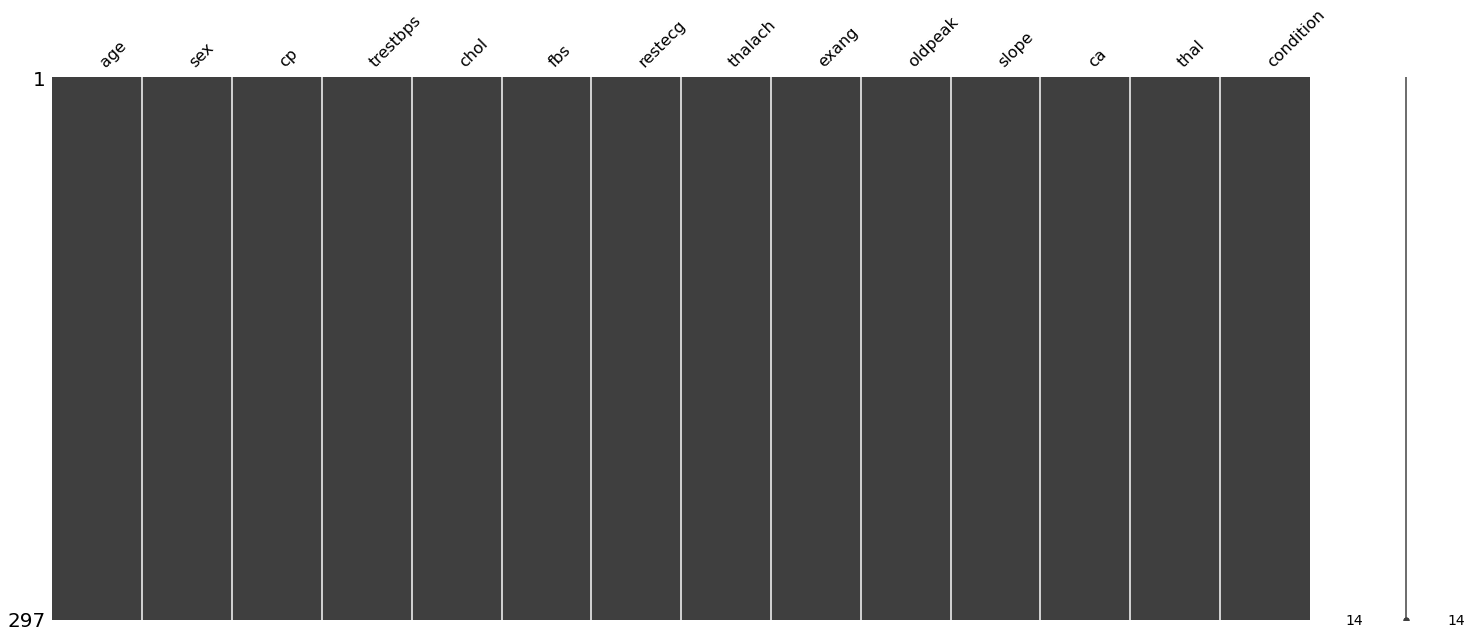

In [4]:
msno.matrix(df)

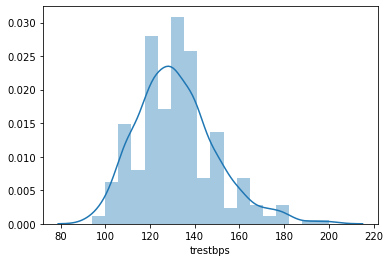

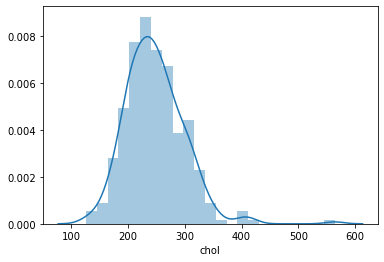

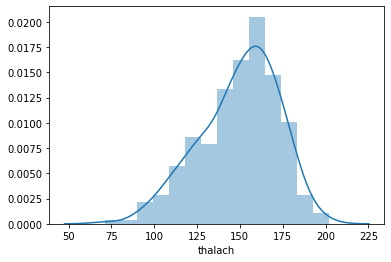

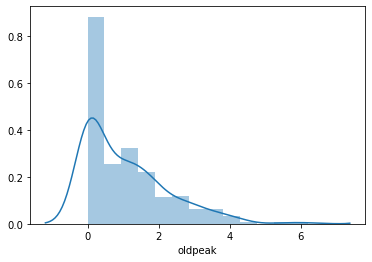

In [5]:
to_viz = ['trestbps', 'chol', 'thalach', 'oldpeak']
for v in to_viz:
    sns.distplot(df[v])
    plt.show()

In [6]:
df.groupby('condition').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
condition,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137


In [7]:
columns = df.columns[1:-1]
y = df.columns[-1:]
columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [8]:
#Create dummies for categorical columns
catColumns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
new_to_produce = []
for col in catColumns: 
    new_to_produce.append(pd.get_dummies(df[col], drop_first=False, prefix=col, dtype=int))

dataLog = pd.concat(new_to_produce, axis = 1)

In [9]:
#dataLog
#df[to_viz]
data = pd.concat([dataLog, df[to_viz]], axis=1)
#len(catColumns)+len(to_viz)

In [10]:
data['condition'] = df['condition']
columns_to_fill = data.drop('condition',axis=1).columns
#columns_to_fill = columns_to_fill[:-1]
df_to_fill = pd.DataFrame(columns = columns_to_fill)

In [11]:
X = data.drop('condition', axis =1)
X.to_csv('dummy')
y = data['condition']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                  y, 
                                                                  test_size=0.25, 
                                                                  stratify=y,
                                                                  random_state = 2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,rfc_pred))
print('Classification Report')
print(classification_report(y_test,rfc_pred))
print('Accuracy :', accuracy_score(y_test,rfc_pred)*100)

Confusion Matrix
[[36  4]
 [ 7 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.88      0.80      0.84        35

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75

Accuracy : 85.33333333333334


In [13]:
from sklearn.model_selection import GridSearchCV

"""
params = { 
            "n_estimators"      : [10,100, 1000, 2000, 4000, 6000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth"         : [2, 4, 8, 12, 15],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid_search = GridSearchCV(estimator = rfc,  
                           param_grid = params,
                           cv = 2,
                           verbose=2)

grid_search.fit(X_train, y_train)
"""


'\nparams = { \n            "n_estimators"      : [10,100, 1000, 2000, 4000, 6000],\n            "max_features"      : ["auto", "sqrt", "log2"],\n            "max_depth"         : [2, 4, 8, 12, 15],\n            "min_samples_split" : [2,4,8],\n            "bootstrap": [True, False],\n            }\ngrid_search = GridSearchCV(estimator = rfc,  \n                           param_grid = params,\n                           cv = 2,\n                           verbose=2)\n\ngrid_search.fit(X_train, y_train)\n'

In [14]:
#RFC with better parameters

In [15]:
#A Logistic Regression is more appropriate for this type of model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
logmod=LogisticRegression()
logmod.fit(X,y)

C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
logmod_pred=logmod.predict(X_test)

In [17]:
print('Confusion Matrix')
print(confusion_matrix(y_test,logmod_pred))
print('Classification Report')
print(classification_report(y_test,logmod_pred))
print('Accuracy :', accuracy_score(y_test,logmod_pred)*100)

Confusion Matrix
[[36  4]
 [ 3 32]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.89      0.91      0.90        35

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

Accuracy : 90.66666666666666


In [18]:
#Let's do a grid search
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1', 'l2', 'elasticnet', 'none']}, 
              {'C': [0, 0.1, 0.01, 0.001, 1.0, 3.0, 6.0, 10.0, 50.0, 100.0]}]
grid_search = GridSearchCV(estimator = logmod,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
bestestim = grid_search.best_estimator_
print('Test accuracy: %.3f' % bestestim.score(X_test, y_test))

C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logi

{'C': 6.0}
Test accuracy: 0.893


C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(grid_search.best_params_)
bestestim = grid_search.best_estimator_
print('Test accuracy: %.3f' % bestestim.score(X_test, y_test))

{'C': 6.0}
Test accuracy: 0.893


In [20]:
logmod2=LogisticRegression(C = 6.0)
logmod2.fit(X,y)

C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=6.0)

In [21]:
logmod2=LogisticRegression(penalty = 'l2')
logmod2.fit(X,y)
logmod2_pred=logmod2.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,logmod2_pred))
print('Classification Report')
print(classification_report(y_test,logmod2_pred))
print('Accuracy: ', accuracy_score(y_test,logmod2_pred)*100)

Confusion Matrix
[[36  4]
 [ 3 32]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.89      0.91      0.90        35

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

Accuracy:  90.66666666666666


C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:

#Create a pipeline
classifiers = {
    'rfc' : RandomForestClassifier(),
    'log' : LogisticRegression()
}

for clas in classifiers:
    print('Testing un-tuned : ', clas)
    classifiers[clas].fit(X_train, y_train)
    class_pred = classifiers[clas].predict(X_test)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,class_pred))
    print('Classification Report')
    print(classification_report(y_test,class_pred))
    print('Accuracy: ', accuracy_score(y_test,class_pred)*100)
    
    print('Tuning the parameters')
    if clas == 'rfc':
        params = { 
            "n_estimators"      : [2, 5, 10,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth"         : [2, 4, 10, 15],
            "min_samples_split" : [2, 4, 8],
            "bootstrap": [True, False],
            }
        grid_search = GridSearchCV(estimator = classifiers[clas],  
                                param_grid = params,
                                cv = 2,
                                verbose=2)

        grid_search.fit(X_train, y_train)
        print("Best params RFC")
        print(grid_search.best_params_)
        bestestim = grid_search.best_estimator_
        print('Test accuracy: %.3f' % bestestim.score(X_test, y_test))
    else: 
        parameters = [{'penalty':['l1', 'l2', 'elasticnet', 'none']}, 
              {'C': [0, 0.1, 0.01, 0.001, 1.0, 3.0, 6.0, 10.0, 50.0, 100.0]}]
        grid_search = GridSearchCV(estimator = logmod,  
                                param_grid = parameters,
                                scoring = 'accuracy',
                                cv = 10,
                                verbose=0)


        grid_search.fit(X_train, y_train)
        print('Best parameters logistic regression')
        print(grid_search.best_params_)
        bestestim = grid_search.best_estimator_
        print('Test accuracy: %.3f' % bestestim.score(X_test, y_test))


Testing un-tuned :  rfc
Confusion Matrix
[[36  4]
 [ 8 27]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.87      0.77      0.82        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75

Accuracy:  84.0
Tuning the parameters
Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=2 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=2 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=5 
[CV]  boot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=2 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=2 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=5 
[CV]  bootstrap=

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:   43.7s finished
C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_pa

Confusion Matrix
[[36  4]
 [ 5 30]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75

Accuracy:  88.0
Tuning the parameters


C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters logistic regression
{'C': 6.0}
Test accuracy: 0.893


C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [34]:
#Re-fitting with tuned parameters
#Create a pipeline
classifiers = [
    RandomForestClassifier(bootstrap = True, max_depth = 15, max_features = 'log2', min_samples_split = 4, n_estimators = 10),
    LogisticRegression(C=6.0)
]

for clas in classifiers: 
    print(clas)
    clas.fit(X_train, y_train)
    pred = clas.predict(X_test)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred))
    print('Classification Report')
    print(classification_report(y_test,pred))
    print('Accuracy: ', accuracy_score(y_test,pred)*100)    


RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=4,
                       n_estimators=10)
Confusion Matrix
[[35  5]
 [ 8 27]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.84      0.77      0.81        35

    accuracy                           0.83        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.83      0.83      0.83        75

Accuracy:  82.66666666666667
LogisticRegression(C=6.0)
Confusion Matrix
[[36  4]
 [ 4 31]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.89      0.89      0.89        35

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75

Accuracy:  89.33333333333333


C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Pickle the model to be used in the app
pickle.dump(logmod2, open('logmod.pkl', 'wb'))